


















I first imported all the programs that i would need for the graphing.

In [58]:
# Import Required Libraries
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Initialize geolocator
geolocator = Nominatim(user_agent="pavement_markings")

Then i set a variable for the file, and print the first 15 lines.

In [45]:
pm = pd.read_csv('2016junebicycle-pavement-markings-existing.csv')
pm.head(15)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,Removed sharrow
0,1,1980,Resevoir Dr,Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,NaN
1,2,1980,Riverview Dr,Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,NaN
2,3,1983,Beechwood Ave,Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,NaN
3,4,2007,Liberty Ave,Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5,2007,Birmingham Bridge,E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,NaN
5,6,2008,East Liberty Blvd,Negley Ave/ Frankstown Rd,Bike Lane,NaN,0.92,1.85,NaN,NaN,NaN
6,7,2008,Greenfield Rd,Pocusset St/ Hobart St,BL/SH,NaN,0.40,0.40,0.40,NaN,NaN
7,8,2009,Wightman Ave,Forbes Ave/ Beacon,Bike Lane,NaN,0.27,0.54,NaN,NaN,NaN
8,9,2009,Beacon Ave,Wightman Ave/ Hobart St,Bike Lane,NaN,0.43,0.86,NaN,NaN,NaN
9,10,2009,Penn Ave,32nd St/ 16th St,Sharrows,NaN,1.10,NaN,1.10,NaN,NaN


After previewing the table, i realized that the only valuable information would be in some columns, so i got the names of the columns printed

In [9]:
print(pm.columns)

Index(['Project ID', 'Year Added', 'Street', 'Cross Streets', 'Type',
       'Protected Bike Lane', 'Street Distance (Miles)',
       'Bike Lane Distance (Miles)', 'Shared Lane Marking Distance (Miles)',
       'Removed bike lane', 'Removed sharrow'],
      dtype='object')


I realized at this point that there was nothing for the neighborhood it was in, so i had to convert the places into longitude and latitude using a service called Geocodio.

In [14]:
rg = pd.read_csv('668d7238-cfd2-492e-b397-51a6e74182ff.csv')
pm2 = pd.read_csv('2016junebicycle-pavement-markings-existing_geocodio_a672351e479b4bd0a0d356a3d0e7cc698ee55871.csv')
pm2.head(15)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,...,Number,Street.1,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,1,1980,"Resevoir Dr, Pittsburgh",Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,...,NaN,E West Dr,NaN,NaN,Pittsburgh,PA,Allegheny County,15237,US,TIGER/Line® dataset from the US Census Bureau
1,2,1980,"Riverview Dr, Pittsburgh",Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,...,NaN,Riverview Dr,NaN,NaN,Pittsburgh,PA,Allegheny County,15212,US,TIGER/Line® dataset from the US Census Bureau
2,3,1983,"Beechwood Ave, Pittsburgh",Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,...,NaN,Beechwood Ave,NaN,NaN,Carnegie,PA,Allegheny County,15106,US,TIGER/Line® dataset from the US Census Bureau
3,4,2007,"Liberty Ave, Pittsburgh",Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Liberty Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15201,US,TIGER/Line® dataset from the US Census Bureau
4,5,2007,"Birmingham Bridge, Pittsburgh",E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,...,NaN,Birmingham Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15210,US,TIGER/Line® dataset from the US Census Bureau
5,6,2008,"East Liberty Blvd, Pittsburgh",Negley Ave/ Frankstown Rd,Bike Lane,NaN,0.92,1.85,NaN,NaN,...,NaN,E Liberty Blvd,NaN,NaN,Pittsburgh,PA,Allegheny County,15206,US,TIGER/Line® dataset from the US Census Bureau
6,7,2008,Greenfield Rd,Pocusset St/ Hobart St,BL/SH,NaN,0.40,0.40,0.40,NaN,...,NaN,NaN,NaN,NaN,Greenfield,IN,Hancock County,46140,US,TIGER/Line® dataset from the US Census Bureau
7,8,2009,"Wightman Ave, Pittsburgh",Forbes Ave/ Beacon,Bike Lane,NaN,0.27,0.54,NaN,NaN,...,NaN,Wightman St,NaN,NaN,Pittsburgh,PA,Allegheny County,15217,US,TIGER/Line® dataset from the US Census Bureau
8,9,2009,Beacon Ave,Wightman Ave/ Hobart St,Bike Lane,NaN,0.43,0.86,NaN,NaN,...,NaN,NaN,NaN,NaN,Avenue,MD,St. Mary's County,20609,US,TIGER/Line® dataset from the US Census Bureau
9,10,2009,"Penn Ave, Pittsburgh",32nd St/ 16th St,Sharrows,NaN,1.10,NaN,1.10,NaN,...,NaN,Penn Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15201,US,TIGER/Line® dataset from the US Census Bureau


I decided to print the columns, as there was many to look through

In [16]:
pm2.columns

Index(['Project ID', 'Year Added', 'Street', 'Cross Streets', 'Type',
       'Protected Bike Lane', 'Street Distance (Miles)',
       'Bike Lane Distance (Miles)', 'Shared Lane Marking Distance (Miles)',
       'Removed bike lane', 'Removed sharrow', 'Latitude', 'Longitude',
       'Accuracy Score', 'Accuracy Type', 'Number', 'Street.1', 'Unit Type',
       'Unit Number', 'City', 'State', 'County', 'Zip', 'Country', 'Source'],
      dtype='object')

After looking at all the columns, I decided that the only columns that matter were the protected bike lane, longitude, and latitude.

In [31]:
pm3 = pd.read_csv('2016junebicycle-pavement-markings-existing_geocodio_a672351e479b4bd0a0d356a3d0e7cc698ee55871.csv', usecols = [5,11,12])
pm3.head(15)

,Protected Bike Lane,Latitude,Longitude
0,NaN,40.509777,-80.016822
1,NaN,40.482658,-80.024487
2,NaN,40.403430,-80.084923
3,NaN,40.459815,-79.970178
4,NaN,40.402689,-79.985396
5,NaN,40.466148,-79.923138
6,NaN,39.821787,-85.775403
7,NaN,40.438358,-79.927541
8,NaN,38.300217,-76.743445
9,NaN,40.464380,-79.963682


After making a new table, I needed to look up the neighborhoods where each street was - and needed to filter it specifically to pittsburgh, and anything that wasnt in Pittsburgh was marked with N/A.

In [54]:
# Extract Neighborhood Information
neighborhoods = []

# Iterate through the latitude and longitude columns to get neighborhood information
for lat, lon in zip(pm3['Latitude'], pm3['Longitude']):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        neighborhood = address.get('neighbourhood', 'N/A')
    except Exception as e:
        neighborhood = 'N/A'
    neighborhoods.append(neighborhood)

# Add the neighborhoods to the DataFrame
pm3['Neighborhood'] = neighborhoods

# Display the updated DataFrame
pm3.head(15)

,Protected Bike Lane,Latitude,Longitude,Neighborhood
0,NaN,40.509777,-80.016822,N/A
1,NaN,40.482658,-80.024487,Perry North
2,NaN,40.403430,-80.084923,N/A
3,NaN,40.459815,-79.970178,Strip District
4,NaN,40.402689,-79.985396,Carrick
5,NaN,40.466148,-79.923138,N/A
6,NaN,39.821787,-85.775403,N/A
7,NaN,40.438358,-79.927541,Squirrel Hill North
8,NaN,38.300217,-76.743445,N/A
9,NaN,40.464380,-79.963682,Lower Lawrenceville


After getting the neighborhoods, I decided to save the file as a new csv, as it would be easier to work at instead of storing it as a local variable (and easier for the grader, as they wouldnt have to use geolocator)

In [56]:
pm3.to_csv('updated_pavement_markings.csv', index=False)

After saving the file, I decided to use the graphing tool to only show the occurances of the protected bike lanes. This would help narrow down which neighborhood was the best.

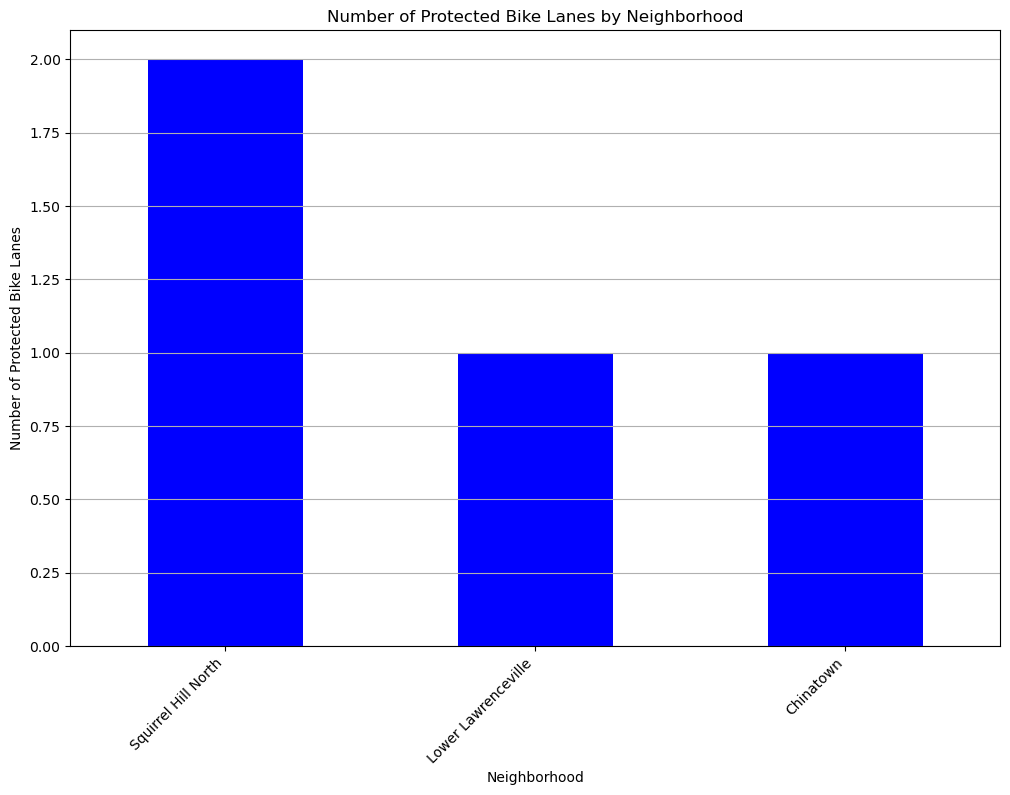

In [69]:
pm3 = pd.read_csv('updated_pavement_markings.csv')
# Filter the DataFrame for protected bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']

# Count the occurrences of protected bike lanes in each neighborhood
neighborhood_counts = protected_bike_lanes['Neighborhood'].value_counts()

# Plot the Data
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Protected Bike Lanes')
plt.title('Number of Protected Bike Lanes by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

After filtering it down to the protected bike lanes, i decided to mix them together, and get the final graph of all the bike lanes in Pittsburgh.

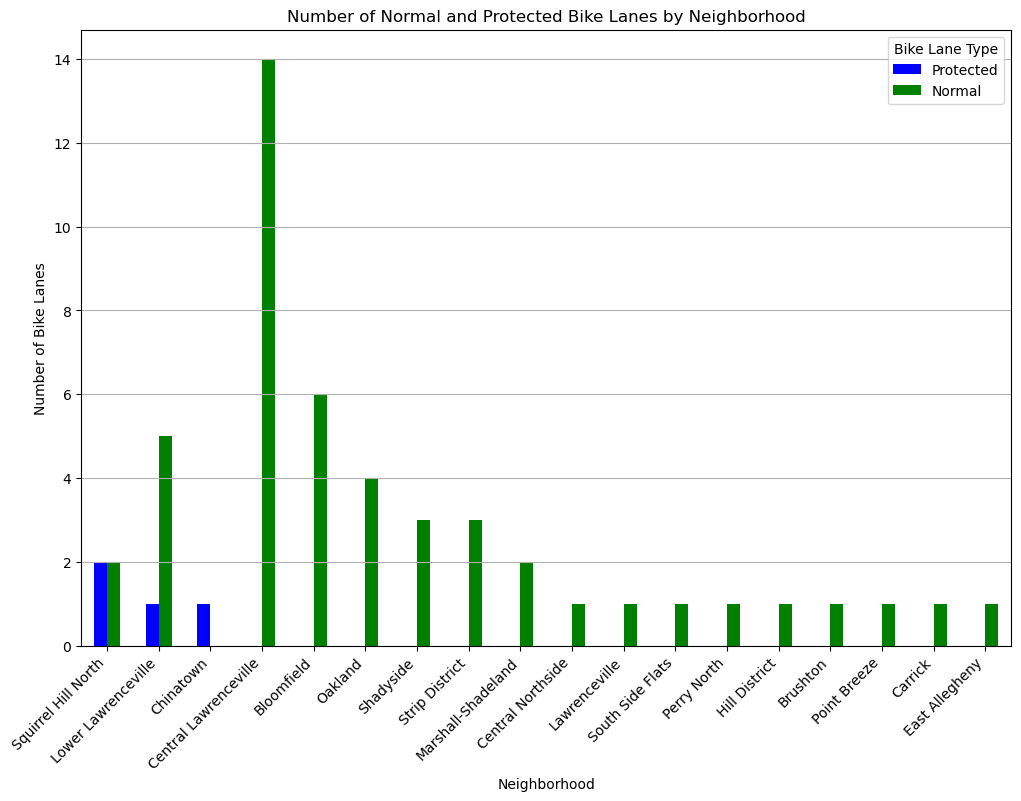

In [73]:
# Filter the DataFrame for protected bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']

# Filter the DataFrame for protected and normal bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']
normal_bike_lanes = pm3[pm3['Protected Bike Lane'].isnull()]

# Count the occurrences of each type of bike lane in each neighborhood
protected_counts = protected_bike_lanes['Neighborhood'].value_counts().rename('Protected')
normal_counts = normal_bike_lanes['Neighborhood'].value_counts().rename('Normal')

# Combine the counts into a single DataFrame
bike_lane_counts = pd.concat([protected_counts, normal_counts], axis=1).fillna(0)

# Plot the Data
bike_lane_counts.plot(kind='bar', figsize=(12, 8), color=['blue', 'green'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Bike Lanes')
plt.title('Number of Normal and Protected Bike Lanes by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bike Lane Type')
plt.grid(axis='y')
plt.show()

Overall, I would say that Centeral Lawrenceville would be the most convinent for biking, but that Squirrel Hill North would be the safest for biking, as Lawrenceville has the highest number of bike lanes, but that Squirrel Hill has the most number of actual protected bike lanes, where it would be harder for a car to accidentally hit a biker.